## Problem and Objective
Nowadays social media has been very influential to all sorts of aspects in human lives that people use this mass media to express their sentiments and views to the publics. These sharing thoughts and emotions has been very useful for the researcher or businesses to analyze and harvest some insights to further understand the needs and demands of the writers. This is very true to social media like Twitter and Facebook. For instance, in 2016 twitter alone had 319 million monthly active users and there were 40 million election-related tweets on the U.S. presidential election day.

This spectrum of influence from social media was the inspiration of this project which aimed to explore what topics that people are talking about on this platform. This project will use only twitter to achieve this goal. 

In [1]:
import pandas as pd
import json
import numpy as np
from textblob import TextBlob

## Methodologies and Data Wrangling
The methodologies for this project was very challenging because it involved many steps just to get the texts ready for cluster modeling. Firstly, we had to collect our tweets from Crate.io because only with this method that we could get the most tweets out of the twitter. This data were collected during August, 2017. This method would include the data from different regions different language. There were more than 50,000 tweets collected from CrateDB with 5 columns. We were only interested in the text column. 

In [2]:
rawdata0 = pd.read_json('tweets_0_.json', lines=True)
rawdata1 = pd.read_json('tweets_1_.json', lines=True)
rawdata2 = pd.read_json('tweets_2_.json', lines=True)
rawdata3 = pd.read_json('tweets_3_.json', lines=True)
rawdata0.head(3)

,account_user,created_at,id,retweeted,source,text
0,NaN,2017-08-15 17:32:31,897511334123892736,False,"<a href=""http://twitter.com/download/android"" ...",RT @qikipedia: What on earth could be more lux...
1,NaN,2017-08-15 17:32:31,897511334085926912,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @Medicis1917: 撃ち落としたら日本がどうなるかを語れよ。日米同盟の為に戦争...
2,NaN,2017-08-15 17:32:31,897511334107009024,False,"<a href=""http://twitter.com/download/android"" ...",@SLandinSoCal @foxandfriends @realDonaldTrump ...


### Most of the tweets consist of different languages, thus I need to filter out only English tweets. I use TextBlob functionality to solve this problem. 

In [4]:
def find_lang(doc): 
    tb = TextBlob(doc)
    if len(tb.words)>5 and type(tb): 
        return tb.detect_language()
    else: 
        return 'none'

def doc_polarity(doc): 
    tb = TextBlob(doc) 
    return tb.sentiment.polarity

def doc_sub(doc): 
    tb  = TextBlob(doc)
    return tb.sentiment.subjectivity

In [6]:
rawdata0['lang']=rawdata0['text'].apply(find_lang)
rawdata1['lang']=rawdata1['text'].apply(find_lang)
rawdata2['lang']=rawdata2['text'].apply(find_lang)
rawdata3['lang']=rawdata3['text'].apply(find_lang)
rawdata0['lang'].head(3)

0      en
1      ja
2    none
Name: lang, dtype: object

In [8]:
frame = [rawdata0, rawdata1, rawdata2, rawdata3]
rawdata = pd.concat(frame)
rawdata.head(3)

,account_user,created_at,id,retweeted,source,text,lang
0,NaN,2017-08-15 17:32:31,897511334123892736,False,"<a href=""http://twitter.com/download/android"" ...",RT @qikipedia: What on earth could be more lux...,en
1,NaN,2017-08-15 17:32:31,897511334085926912,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @Medicis1917: 撃ち落としたら日本がどうなるかを語れよ。日米同盟の為に戦争...,ja
2,NaN,2017-08-15 17:32:31,897511334107009024,False,"<a href=""http://twitter.com/download/android"" ...",@SLandinSoCal @foxandfriends @realDonaldTrump ...,none


In [13]:
rawdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12648 entries, 0 to 12647
Data columns (total 7 columns):
account_user    0 non-null float64
created_at      12648 non-null datetime64[ns]
id              12648 non-null int64
retweeted       12648 non-null bool
source          12648 non-null object
text            12648 non-null object
lang            12648 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 704.0+ KB


In [14]:
df= rawdata[rawdata['lang']=='en']
df = df.reset_index()
df = df[['text', "retweeted", 'source']]
df.head(3)

,text,retweeted,source
0,RT @qikipedia: What on earth could be more lux...,False,"<a href=""http://twitter.com/download/android"" ..."
1,@mixedoIan @GraysonDolan @EthanDolan YOU ARENT...,False,"<a href=""http://twitter.com/download/iphone"" r..."
2,RT @amjoyshow: Justice demands 1.3M IP address...,False,"<a href=""http://twitter.com/download/android"" ..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17808 entries, 0 to 17807
Data columns (total 3 columns):
text         17808 non-null object
retweeted    17808 non-null bool
source       17808 non-null object
dtypes: bool(1), object(2)
memory usage: 295.7+ KB


In [134]:
# Compile global list of stopwords
stoplist  = nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("french")+ nltk.corpus.stopwords.words("german")

In [207]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import string
import nltk
import pyLDAvis.gensim
 
punctuation = list(string.punctuation)

tokenizer = RegexpTokenizer(r'\w+')

more_stopwords = ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using', 'co','y','rt', 'via', 
            'RT', 'http', 'https',' ','I','t','l','s','3','re','1','A','6','5','0','7','8','4'
            'Y', 'C', 'In', 'To', 'R', 'gt', 'Don', 'IF', 'Oh', '2', 'IN','We', '23', '21', '00',
            'Is', '50', 'F', 'T', 'abi', 'u', 'P', 'DO', 'One', 'If', 'Did', 'Ye', '20', '12',
            '000', 'To', 'go', '10', '30', '08', 'Let', 'D', '17', '16', 'The', '24', 'ur', 'B',
            'S', '2', 'As', 'How', 'a', 'Our','You', 'U', 'TO', 'Me', 'You', 'even', 'AND', 'NOT',
            'tho', 'ON', 's', 'to','ok','2nd','due']
# create English stop words list
#en_stop = get_stop_words('en') + punctuation + more_stopwords

en_stop = set(stoplist + punctuation + more_stopwords)

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [376]:
#remove emoticon, URL, hash-tag from the text
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)    
    
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def encoding(text):   
    t = text.encode('utf-8')
    return t

In [393]:
lower_text[:20]

0     rt @qikipedia: what on earth could be more lux...
1     @mixedoian @graysondolan @ethandolan you arent...
2     rt @amjoyshow: justice demands 1.3m ip address...
3     rt @ethandolan: wow you guys are really the be...
4     rt @gayanaxo: when i care, i care hard. when i...
5     rt @yourlru: nothing but respect for my random...
6     eating dinner with beloved family♥ at red appl...
7     rt @wolfkjm: pls read. as consumers &amp; acti...
8     rt @chuuzus: i wanna be drowned in good health...
9     rt @skullmandible: if you're clutching your pe...
10    rt @standardkenya: gsu officers critically inj...
11    rt @asiacato: damn maybe i do want friends htt...
12    rt @bubbleteaholic: [hq] 170721 #sehun cr:apcy...
13    rt @kimjipics: he's a baby 😢😭💕💖💞💝💘💗 ht...
14    rt @flirtynotes: the hardest thing is not talk...
15    @jplascencia @mtv @vmas oh yeah i mean you can...
16    @realdonaldtrump here's some advice for @reald...
17    news: team news: confirmed liverpool line-up v...


In [556]:
lower_text = df.text

In [557]:
lower_text = lower_text.apply(encoding)
lower_text = df.text.apply(lambda x: x.lower())
#lower_text = df.text.apply(preprocess)
#lower_text = df.text.apply(encoding)

In [559]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in lower_text:
    
    # clean and tokenize document string
    #raw = i.lower()
    tokens = tokenizer.tokenize(i)
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    #stopped_tokens = [i.decode("utf8","ignore") for i in stopped_tokens]
    
    # remove the emoticons, url and hashtag
    final_stopped_tokens = [i for i in stopped_tokens]
    
        
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in final_stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

In [403]:
print text[:20]

[u"[u'bluenoterecords']", u"[u'uk']", u"[u'trio']", u"[u'gogo_penguin']", u"[u'kicks']", u"[u'north']", u"[u'american']", u"[u'tour']", u"[u'sept']", u"[u'vdzsvl', u'7', u'ro8']"]


## Model Design and Result
In order to run LDA model on the cleaned texts, we had to create a python dictionary for the text corpus as a structured set of text.  With this corpus, we could feed the text into LDA model to check for their topics and visualize it with a library called pyLDAvis.

In [404]:
dictionary = corpora.Dictionary(texts)

In [405]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [406]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary,passes =50, alpha= 0.001)

In [407]:
print(ldamodel.print_topics(num_topics=5, num_words=10))

[(0, u'0.008*"love" + 0.005*"vote" + 0.003*"peopl" + 0.003*"time" + 0.003*"right" + 0.002*"feel" + 0.002*"taylor" + 0.002*"omg" + 0.002*"album" + 0.002*"life"'), (1, u'0.006*"ladi" + 0.005*"mtvhottest" + 0.004*"gaga" + 0.003*"win" + 0.003*"love" + 0.003*"fuck" + 0.002*"zara" + 0.002*"larsson" + 0.002*"fake" + 0.002*"2017"'), (2, u'0.007*"video" + 0.006*"girl" + 0.005*"youtub" + 0.005*"sex" + 0.004*"ever" + 0.003*"porn" + 0.003*"year" + 0.003*"cri" + 0.003*"happi" + 0.003*"think"'), (3, u'0.010*"trump" + 0.009*"follow" + 0.006*"peopl" + 0.004*"retweet" + 0.004*"white" + 0.004*"nazi" + 0.003*"check" + 0.002*"year" + 0.002*"everyon" + 0.002*"give"'), (4, u'0.005*"shit" + 0.005*"look" + 0.005*"thing" + 0.005*"time" + 0.004*"love" + 0.004*"fuck" + 0.004*"never" + 0.004*"peopl" + 0.004*"back" + 0.004*"take"')]


In [408]:
ldamodel.print_topics(num_topics=10)

[(0,
  u'0.008*"love" + 0.005*"vote" + 0.003*"peopl" + 0.003*"time" + 0.003*"right" + 0.002*"feel" + 0.002*"taylor" + 0.002*"omg" + 0.002*"album" + 0.002*"life"'),
 (1,
  u'0.006*"ladi" + 0.005*"mtvhottest" + 0.004*"gaga" + 0.003*"win" + 0.003*"love" + 0.003*"fuck" + 0.002*"zara" + 0.002*"larsson" + 0.002*"fake" + 0.002*"2017"'),
 (2,
  u'0.007*"video" + 0.006*"girl" + 0.005*"youtub" + 0.005*"sex" + 0.004*"ever" + 0.003*"porn" + 0.003*"year" + 0.003*"cri" + 0.003*"happi" + 0.003*"think"'),
 (3,
  u'0.010*"trump" + 0.009*"follow" + 0.006*"peopl" + 0.004*"retweet" + 0.004*"white" + 0.004*"nazi" + 0.003*"check" + 0.002*"year" + 0.002*"everyon" + 0.002*"give"'),
 (4,
  u'0.005*"shit" + 0.005*"look" + 0.005*"thing" + 0.005*"time" + 0.004*"love" + 0.004*"fuck" + 0.004*"never" + 0.004*"peopl" + 0.004*"back" + 0.004*"take"')]

In [409]:
# First LDA model with 5 topics
topic_data =  pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(topic_data)

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [410]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes =100, alpha= 0.001)

In [411]:
# First LDA model with 50 topics
topic_data =  pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(topic_data)

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [412]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=17, id2word = dictionary, passes =1, alpha= 0.001)

In [413]:
# First LDA model with 50 topics
topic_data =  pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(topic_data)

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [414]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes =15, alpha= 0.001)

In [415]:
# First LDA model with 15 topics
topic_data =  pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(topic_data)

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


With LDA modeling, there was no ground rule to what indicated how many topics were ideal, but based on experiences and personal judgment on the topic itself, and by looking how cohesive the topics were followed by their probabilities. In order to do this, we had to test the LDA model with different parameters like k (topics), beta and alpha. Below is the descriptive explanation quoted from medium website: 
-	K: the number of topics
-	Alpha which dictates how many topics a document potentially has. The lower alpha, the lower the number of topics per documents
-	Beta which dictates the number of word per document. Similarly, to Alpha, the lower Beta is, the lower the number for words per topic.

From Table 1, Figure 1 and 2, it had shown that 15 topics gave a more dispersed point on the pyLDAvis and it included all the topics covered in 5 topics. With these 15 topics, the most frequent topics appeared many time were listed below: 
-	2nd topic talked more about President Trump and around racial issues: trump, white, nazi, bad, eclips, presid, racist, sumpremacist
-	3rd topic mentioned sexual contents on the internet: girl, sex, fuck, video, porn, beauty, ad, teen, hot, pic
-	4th topic talked more about being back to school: never, first, time, high, people, school, learn, public, start
-	12th topic talked about youtube media: youtube, talk, like, video, Justin, friend, Bieber, exo
-	13th topic showed some emotions on internet: cri, happi, bless, birthday, lose, hurt, rest
15th topic talked about celebrities: ladi, gaga, mtvhottest, Larsson, zara, tri

In [434]:
texts = [str(i) for i in texts]

In [435]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(texts, train_size = 0.8, random_state = 20 )

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [432]:
# Validating Tf-idf parameters for use. 
vectorizer = TfidfVectorizer(max_df=1.0, min_df=0.0, sublinear_tf=True, 
                             ngram_range=(1,3), stop_words=en_stop)
X = vectorizer.fit_transform(train)
X.shape

(14246, 196941)

In [533]:
# Validating Tf-idf parameters for use. 
vectorizer = TfidfVectorizer(max_df=1.0, min_df=0.0001, sublinear_tf=True, 
                             ngram_range=(1,3), stop_words=en_stop)
X = vectorizer.fit_transform(train)
X.shape

(14246, 17818)

In [441]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Creating an iterable function for key parameter tuning
def model_iteration(min_df, max_df, num_k, data) :
    for k in range(num_k) :
        if k > 1 :
            vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, sublinear_tf=True, 
                             ngram_range=(1,3), stop_words=en_stop)
            X = vectorizer.fit_transform(data)
            model = KMeans(n_clusters=k)
            #init='k-means++', max_iter=100, n_init=1
            model.fit(X)

            #print("Top terms per cluster:")
            order_centroids = model.cluster_centers_.argsort()[:, ::-1]
            terms = vectorizer.get_feature_names()

            centroids = model.cluster_centers_
            labels = model.labels_
            
            temp_score = model.score(X)
            print('Score for K value of ' + str(k) + ' is ' + str(temp_score))
            
            silhouette_avg = silhouette_score(X, labels)
            print("For min_df of " + str(min_df) + " max_df of " + str(max_df) + " "+ str(k) + " cluster(s)" 
                  +  " the average silhouette_score is :", silhouette_avg)

In [443]:
# Let's play around with the new function we created to iterate over the proper "K" values
min_df = 0.00 # minimum frequency of words needed to be a part of the model
max_df = 1.0 # max frequency of words to take into account as part of the model
num_k = 10 # number of clusters
data = train # use the train data set
model_iteration(min_df, max_df, num_k, data)

Score for K value of 2 is -14195.6705352
('For min_df of 0.0 max_df of 1.0 2 cluster(s) the average silhouette_score is :', 0.0016132055000150131)
Score for K value of 3 is -14191.7219063
('For min_df of 0.0 max_df of 1.0 3 cluster(s) the average silhouette_score is :', 0.0014312009284980745)
Score for K value of 4 is -14186.4573231
('For min_df of 0.0 max_df of 1.0 4 cluster(s) the average silhouette_score is :', 0.0014940462422173347)
Score for K value of 5 is -14176.0071063
('For min_df of 0.0 max_df of 1.0 5 cluster(s) the average silhouette_score is :', 0.0018739362490698813)
Score for K value of 6 is -14171.0005278
('For min_df of 0.0 max_df of 1.0 6 cluster(s) the average silhouette_score is :', 0.0019949552802704515)
Score for K value of 7 is -14157.5058174
('For min_df of 0.0 max_df of 1.0 7 cluster(s) the average silhouette_score is :', 0.0029453010856671851)
Score for K value of 8 is -14161.7800504
('For min_df of 0.0 max_df of 1.0 8 cluster(s) the average silhouette_score i

### Let's play around with the new function we created to iterate over the proper "K" values
min_df = 0.001 # minimum frequency of words needed to be a part of the model
max_df = 1.0 # max frequency of words to take into account as part of the model
num_k = 10 # number of clusters
data = train # use the train data set
model_iteration(min_df, max_df, num_k, data)

In [516]:
# Let's play around with the new function we created to iterate over the proper "K" values
min_df = 0.015 # minimum frequency of words needed to be a part of the model
max_df = 1.0 # max frequency of words to take into account as part of the model
num_k = 10 # number of clusters
data = train # use the train data set
model_iteration(min_df, max_df, num_k, data)

Score for K value of 2 is -4010.62264034
('For min_df of 0.015 max_df of 1.0 2 cluster(s) the average silhouette_score is :', 0.56792506673318566)
Score for K value of 3 is -3715.02543721
('For min_df of 0.015 max_df of 1.0 3 cluster(s) the average silhouette_score is :', 0.59195224899335297)
Score for K value of 4 is -3473.54393881
('For min_df of 0.015 max_df of 1.0 4 cluster(s) the average silhouette_score is :', 0.61380665947090984)
Score for K value of 5 is -3248.27937699
('For min_df of 0.015 max_df of 1.0 5 cluster(s) the average silhouette_score is :', 0.63254481507468074)
Score for K value of 6 is -2910.88687415
('For min_df of 0.015 max_df of 1.0 6 cluster(s) the average silhouette_score is :', 0.66376050671120157)
Score for K value of 7 is -2707.05367772
('For min_df of 0.015 max_df of 1.0 7 cluster(s) the average silhouette_score is :', 0.68096167061220203)
Score for K value of 8 is -2500.82164916
('For min_df of 0.015 max_df of 1.0 8 cluster(s) the average silhouette_score

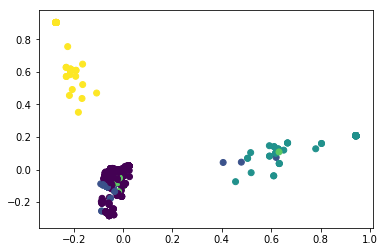

In [514]:
#The First option of testing with different numbers in parameters as below: 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA

min_df = 0.015 # minimum frequency of words needed to be a part of the model
max_df = 1.0 # max frequency of words to take into account as part of the model
k = 5 # number of clusters

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, sublinear_tf=True, 
                             ngram_range=(1,3), stop_words=en_stop)
X = vectorizer.fit_transform(test)
model = KMeans(n_clusters=k)
#init='k-means++', max_iter=100, n_init=1
model.fit(X)

#print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

centroids = model.cluster_centers_
labels = model.labels_

Y = X.todense()

pca = PCA(n_components=3).fit(Y)
data2D = pca.transform(Y)
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
plt.show()              #not required if using ipython notebook

In [541]:
def new_k_test(k, max_df, min_df,pca_num) :
    vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, sublinear_tf=True, 
                             ngram_range=(1,3), stop_words=en_stop)
    X = vectorizer.fit_transform(train)
    model = KMeans(n_clusters=k)
    #, init='k-means++', max_iter=100, n_init=1
    model.fit(X)
    y_kmeans = model.predict(X)

    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :15]:
            print(' %s' % terms[ind]),
        print

    centroids = model.cluster_centers_
    labels = model.labels_
    clusters = model.labels_.tolist()

    silhouette_avg = silhouette_score(X, labels)
    print("For " + str(k) + " cluster(s)" +  " the average silhouette_score is :", silhouette_avg)
    
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
    ])        
    Y = pipeline.fit_transform(train).todense()

    pca = PCA(n_components=pca_num).fit(Y)
    data2D = pca.transform(Y)
    plt.scatter(data2D[:,0], data2D[:,1], c=labels)
    plt.show()

Top terms per cluster:
Cluster 0:  time  video  follow  fuck  girl  come  year  never  take  thing
Cluster 1:  trump  year  peopl  us  take  thing  never  time  think  back
Cluster 2:  love  life  thing  girl  follow  never  shit  back  us  come
Cluster 3:  look  girl  think  us  love  trump  take  peopl  back  time
Cluster 4:  peopl  follow  love  think  time  thing  life  take  come  shit
('For 5 cluster(s) the average silhouette_score is :', 0.63869052860232167)


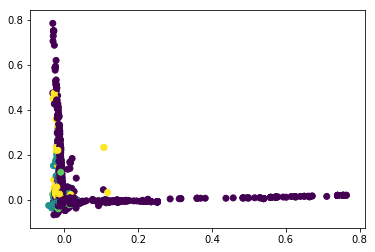

In [518]:
new_k_test(5,1.0,0.015,5)

Top terms per cluster:
Cluster 0:  love  look  beauti  hate  peopl  life  us  tell  heart  guy
Cluster 1:  peopl  trump  fuck  video  think  girl  come  thing  year  take
Cluster 2:  time  first  everi  take  watch  sex  tweet  peopl  mani  bad
Cluster 3:  follow  retweet  win  everyon  check  giveaway  twitter  peopl  person  chanc
Cluster 4:  play  ladi  ladi gaga  gaga  mtvhottest ladi gaga  mtvhottest ladi  mtvhottest  zara  larsson  zara larsson
('For 5 cluster(s) the average silhouette_score is :', 0.078833344508750028)


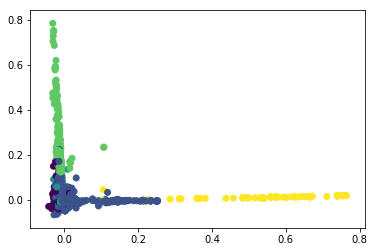

In [519]:
#The Second option of testing with different numbers in parameters as below: 
new_k_test(5,1.0,0.003,5)

Top terms per cluster:
Cluster 0:  peopl  fuck  follow  video  girl  youtub  ladi  gaga  ladi gaga  mtvhottest
Cluster 1:  look  beauti  face  guy  arriv  eclips  cute  embarrass  made  think
Cluster 2:  tweet  guy  time  retweet  follow  excit  us  twitter  back  hope
Cluster 3:  love  hate  life  peopl  beauti  stori  heart  fall  thing  us
Cluster 4:  time  trump  come  think  thing  never  take  year  life  back
('For 5 cluster(s) the average silhouette_score is :', 0.027235784241771133)


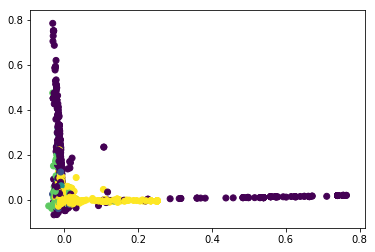

In [528]:
new_k_test(5,1.0,0.001,5)

Top terms per cluster:
Cluster 0:  love  look  follow  ladi gaga  gaga  ladi  mtvhottest ladi gaga  mtvhottest ladi  mtvhottest  zara larsson
Cluster 1:  peopl  fuck  video  trump  girl  come  thing  never  take  back
Cluster 2:  time  think  first time  first  everi  watch  everi time  peopl  take  ever
('For 3 cluster(s) the average silhouette_score is :', 0.025208487768427573)


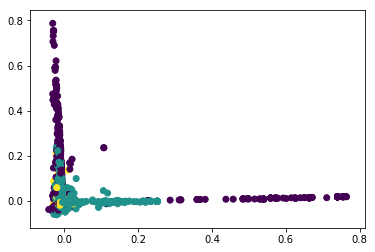

In [529]:
new_k_test(3,1.0,0.001,3)

Top terms per cluster:
Cluster 0:  back  back school  come back  school  follow  follow back  come  text back  everyon  text
Cluster 1:  look  time  peopl  fuck  think  follow  trump  girl  come  thing
Cluster 2:  video  youtub  youtub video  sex  video youtub  music video  porn  music  sex video  ad
Cluster 3:  mtvhottest  ladi gaga  gaga  ladi  mtvhottest ladi  mtvhottest ladi gaga  gaga zara larsson  gaga zara  ladi gaga zara  zara
Cluster 4:  love  hate  peopl  love love  beauti  fall love  birthday  happi  thing  life
('For 5 cluster(s) the average silhouette_score is :', 0.0088323780514050765)


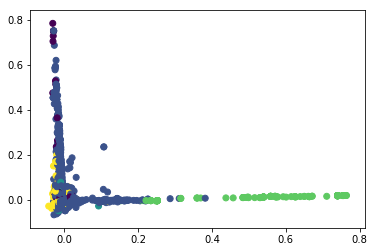

In [535]:
new_k_test(5,1.0,0.0001,3)

Top terms per cluster:
Cluster 0:  ladi gaga  gaga  ladi  mtvhottest ladi  mtvhottest ladi gaga  mtvhottest  gaga zara  gaga zara larsson  ladi gaga zara  larsson  zara  zara larsson  vote monster  monster  vote  littl mix  mix  xx  littl  zara larsson clean
Cluster 1:  thing  thing ever  ever  love  happen  seen  thing happen  tell  bad  life  cutest thing  peopl  never  cutest  ever seen  right  cutest thing ever  back  thing never  hope
Cluster 2:  love  hate  peopl  beauti  love love  birthday  heart  happi  life  us  world  happi birthday  fall love  show  never  friend  girl  feel  send  care
Cluster 3:  come  come back  come soon  soon  back  special  video come  special video  video come drop  come drop earli  vikkstar123 special  vikkstar123 special video  come drop  drop earli  special video come  vikkstar123  think  earli  time come  play
Cluster 4:  follow  trump  pleas  retweet  donald  donald trump  everyon  automat check  automat  check  presid  peopl  follow everyon  wi

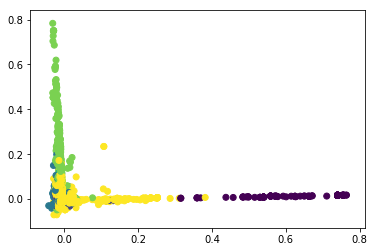

In [540]:
#The Third option of testing with different numbers in parameters as below: 
new_k_test(6,1.0,0.0001,5)

Top terms per cluster:
Cluster 0:  look  ladi gaga  gaga  ladi  mtvhottest ladi  mtvhottest ladi gaga  mtvhottest  zara  zara larsson  larsson  ladi gaga zara  gaga zara larsson  gaga zara  vote monster  bolstonmoesha taken wbi
Cluster 1:  video  sex  youtub  youtub video  girl  porn  nude  video youtub  music video  nake  teen  music  sex video  ad  sexi
Cluster 2:  love  hate  peopl  beauti  love love  fall love  birthday  thing  happi  life  heart  us  fall  world  happi birthday
Cluster 3:  time  peopl  fuck  think  trump  come  thing  shit  never  year  take  life  girl  back  feel
Cluster 4:  follow  automat check  automat  retweet  check  follow everyon  everyon  unfollow  win  person  gain  retweet follow  unfollow automat check  unfollow automat  follow everyon retweet
('For 5 cluster(s) the average silhouette_score is :', 0.0080724568998937936)


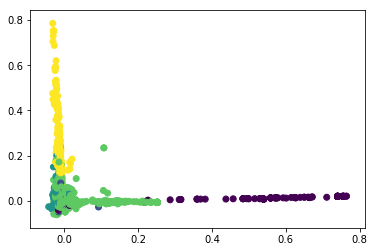

In [546]:
new_k_test(5,1.0,0.0001,4)

Top terms per cluster:
Cluster 0:  ladi gaga  gaga  mtvhottest ladi gaga  mtvhottest ladi  ladi  mtvhottest  gaga zara  gaga zara larsson  ladi gaga zara  larsson  zara  zara larsson  vote monster  monster  vote
Cluster 1:  look  guy  face  look made  cute  made  look forward  think  forward  look cute  photo  us  eclips  look amaz  better
Cluster 2:  thing  tell  someon  ever  thing ever  never  feel  bad  talk  cri  happen  seen  think  us  thing happen
Cluster 3:  person  automat check  automat  check  follow automat check  follow automat  person follow  unfollow automat  unfollow automat check  follow  unfollow  person follow automat  person unfollow automat  person unfollow  peopl follow
Cluster 4:  follow  happi  lol  birthday  happi birthday  retweet  everyon  follow everyon  win  retweet follow  gain  stat  follow everyon retweet  everyon retweet  giveaway
Cluster 5:  love  hate  love love  fall love  beauti  heart  fall  thing  us  world  show  friend  life  send  happi
Cluste

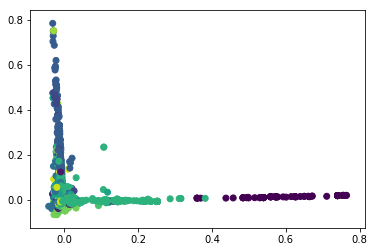

In [550]:
new_k_test(15,1.0,0.0001,5)

The first seemed very reasonable since the clusters were distinguishable between each other yet if we looked at the number of words that were used in this model; it was too small. Thus, we would reject this option. The second option and last option were very similar in the graph and the colors were understandable to where the clusters were. However, in the 3rd option the dark green color seemed to mixed up with the yellow color. The 3rd option was considered the best one so far from our testing. We shall examine the topic in the 3rd option as below: 
Table 5: Top Terms Per Cluster
    Cluster 0:  ladi gaga  gaga  ladi  mtvhottest ladi  mtvhottest ladi gaga  mtvhottest  gaga zara  
gaga zara larsson  

    Cluster 1:  thing  thing ever  ever  love  happen  seen  thing happen  tell  bad  life  cutest thing  peopl  

    Cluster 2:  love  hate  peopl  beauti  love love  birthday  heart  happi  life  us  world  happi birthday  fall 

    Cluster 3:  come  come back  come soon  soon  back  special  video come  special video  video come drop  come drop 

    Cluster 4:  follow  trump  pleas  retweet  donald  donald trump everyon  automat check automat  check  presid  

    Cluster 5:  look  time  fuck  peopl  think  video  girl  shit  take  neve

    With 6 clusters and 5 components of PCA, the model showed clustering words very similar to the graph produced by pyLDAvis. These clusters portrayed many popular terms people use in their tweets but there were only four logical topics that showed the mainstream news during August 2017 like singers (Lady Gaga…etc.) Donald Trump as well as other miscellaneous topics like pornography and human emotions.